In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Creating dataframe by reading the csv file

In [3]:
df = pd.read_csv('car_price.csv')

##### Going through first five rows of the dataframe

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
print('Number of rows :', df.shape[0])
print('Number of columns :', df.shape[1])

Number of rows : 205
Number of columns : 26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

##### Basic understanding about data

- Total number of entries are 205.
- Total there are 26 variable include car_ID            .
- There are categorial and numberical variables.
- Numerical variables are of datatype int64 and float64.
- Categorical variables are of object datatype.
- price is the target variable.
- No null values in any columns.
- Need to drop Car_ID.

##### Statistical analysis

In [8]:
df.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


##### Comment


- Most people prefer gas.
- Most people choose four door vehicle and sedan, maybe because as a family car.
- People choose FWD over other, because they are more affordable, fuel efficient and cheaper than RWD and AWD.
- Four cylinder sold the most, maybe they have more mileage to power ratio.

### Cleaning the data

In [9]:
# dropping car_ID based on business knowledge

df = df.drop('car_ID',axis=1)

In [10]:
df['price'].isnull().sum()

0

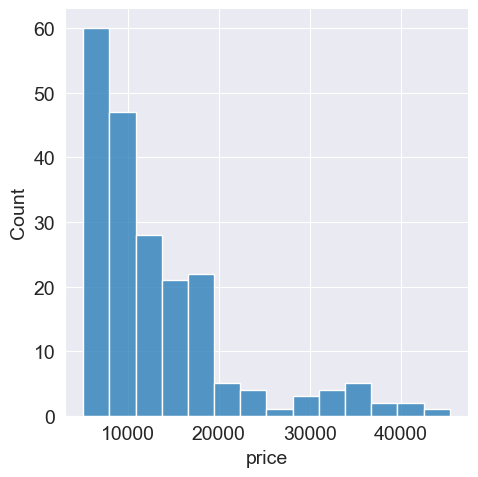

In [11]:
sns.displot(df['price'])

##### Comment

- Best selling segment is between 5000 and 11000.
- The distribution shows a positive skewness, so the mean is greater than median.
- Its look like almost all the cars less than 15000

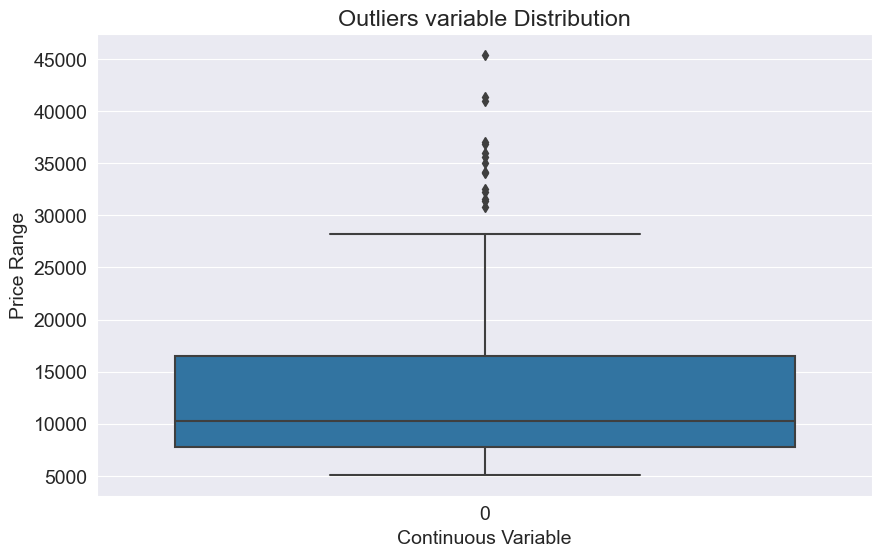

In [12]:
# Outlier analysis of target variable
sns.boxplot(data = df.price, orient='v')
plt.title('Outliers variable Distribution')
plt.ylabel('Price Range')
plt.xlabel('Continuous Variable')
plt.show()

##### Insights:
- There are some price ranges above 36000 which can be termed as outliers but they lets not remove it rather we will use standardization scaling.

In [13]:
# Extracting Car Company from the CarName

df[['CarBrand', 'CarName']] = df.CarName.str.split(' ', expand=True, n =1)
df.drop(['CarName'], axis=1, inplace = True)

In [14]:
# Unique Car company

df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Typo Error in car company name

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [15]:
# Renaming the typo errors in Car Company names

df['CarBrand'] = df['CarBrand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [16]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df['symboling'] = df['symboling'].astype(str)

In [17]:
# Checking for duplicate values 
df.duplicated().sum()

0

#### Univariate analysis

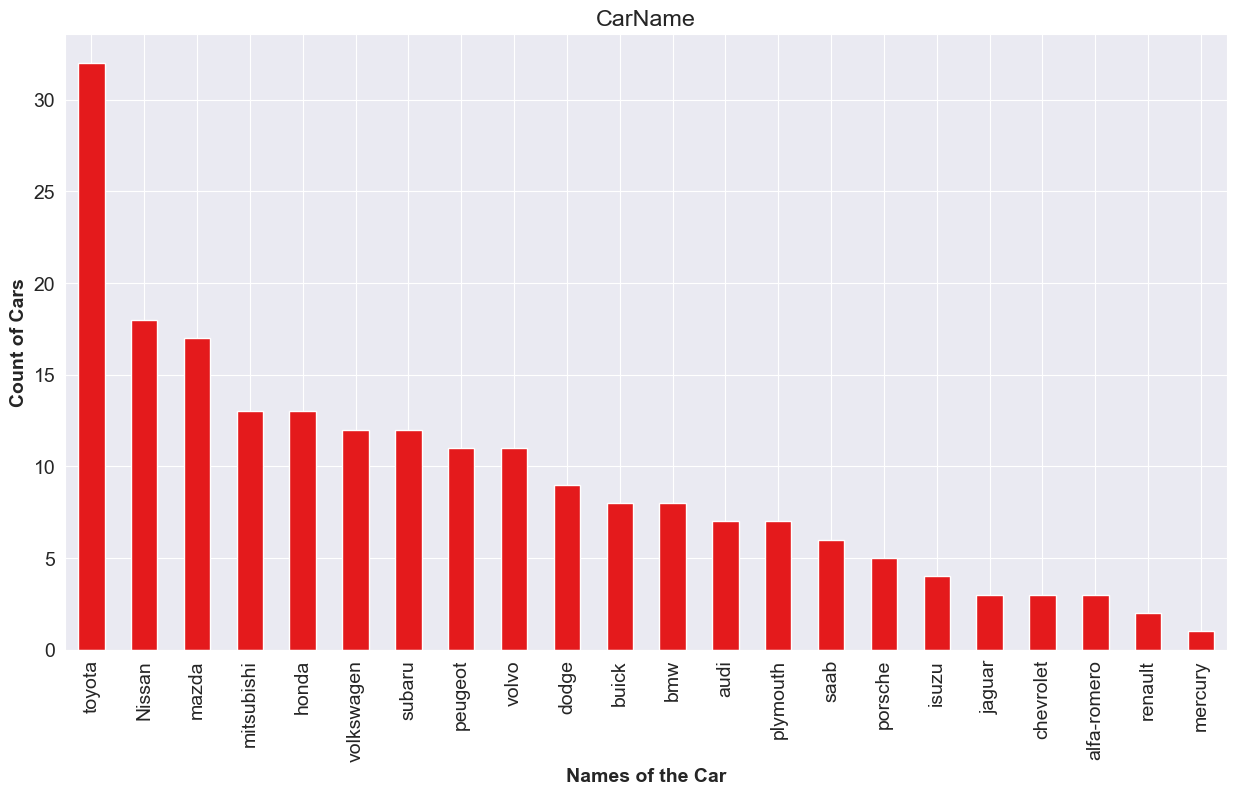

In [18]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['CarBrand'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

##### Insights :

- Toyota seems to be the most favoured cars.
- Mercury seems to be the least favoured cars.

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

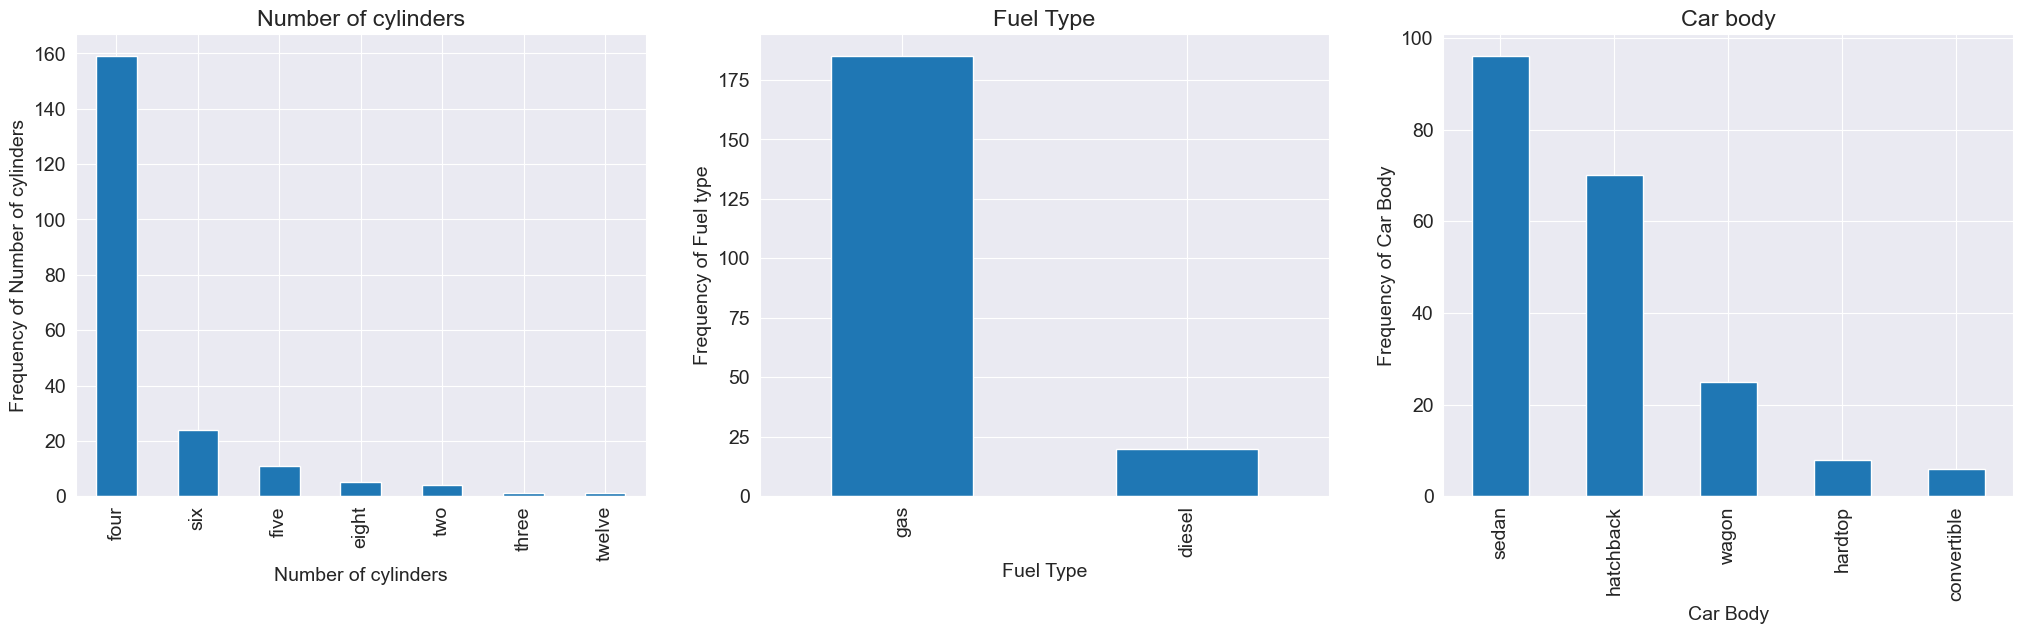

In [19]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

#### Insights:

- The number of cylinders used in most cars is four.
- Number of Gas fueled cars are way more than diesel fueled cars.
- Sedan is the most prefered car type.

### Bivariate analysis

##### Relationship between fuelsystem vs price with hue fueltype

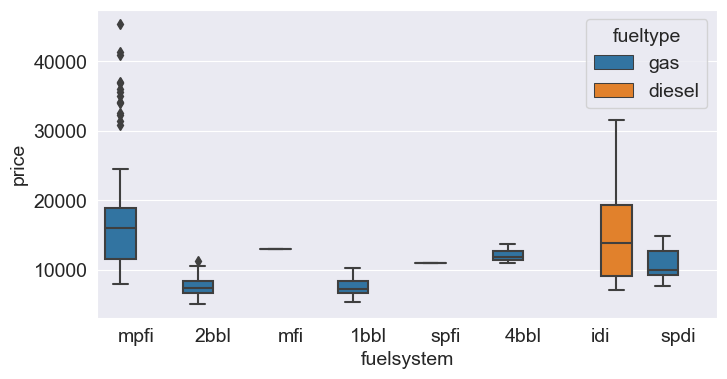

In [20]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

##### Relationship between carbody vs price with hue enginelocation

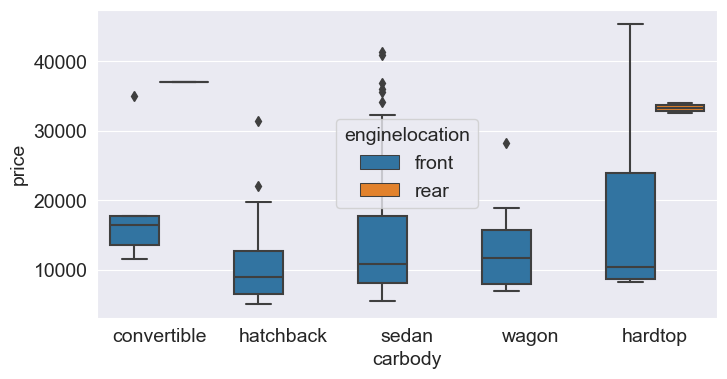

In [21]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

##### Relationship between cylindernumber vs price with hue fueltype

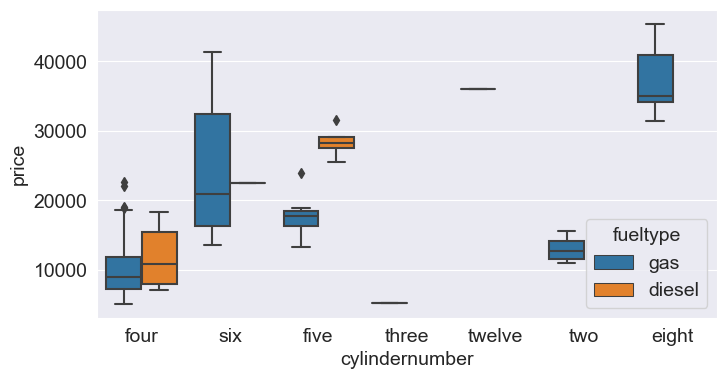

In [22]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

#### Derived Metrices

- Average Price

<Figure size 800x400 with 0 Axes>

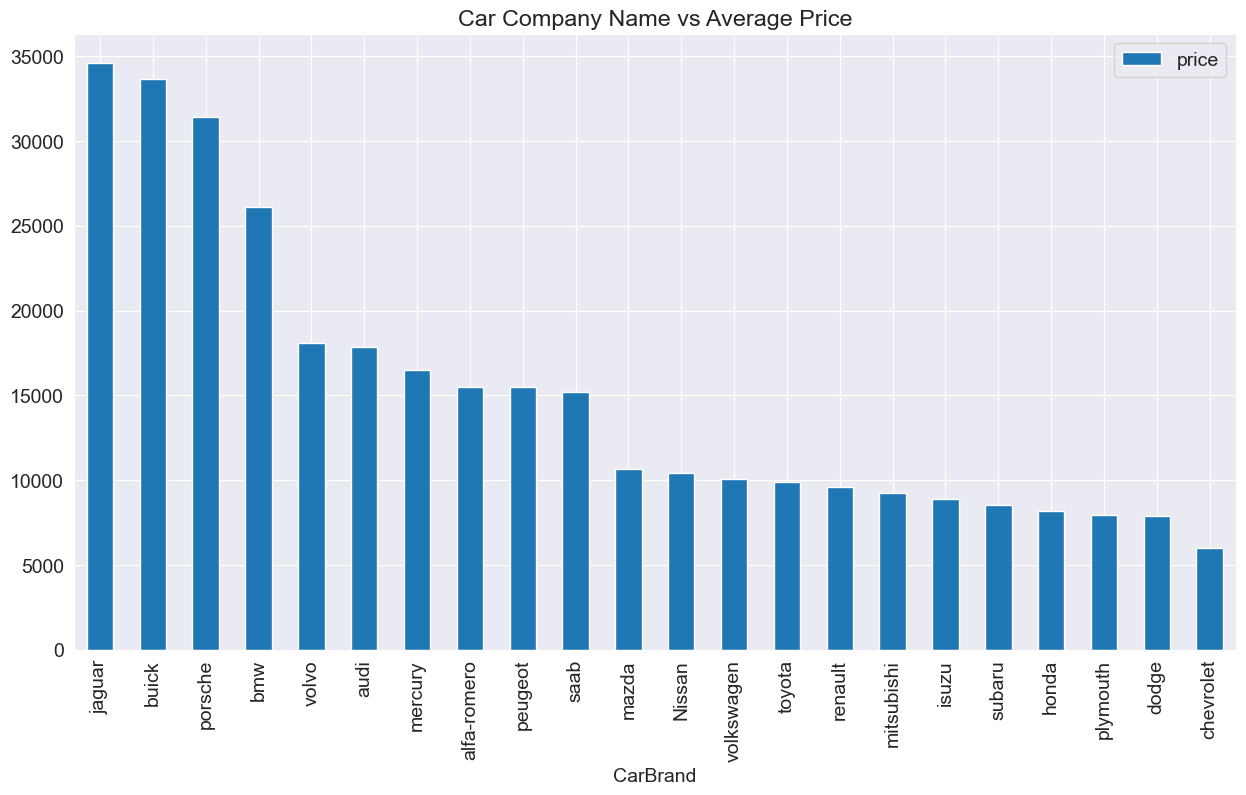

In [23]:
plt.figure(figsize=(8, 4))

df_autox = pd.DataFrame(df.groupby(['CarBrand'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:

- Jaguar,Buick and porsche seems to have the highest average price.

<Figure size 800x400 with 0 Axes>

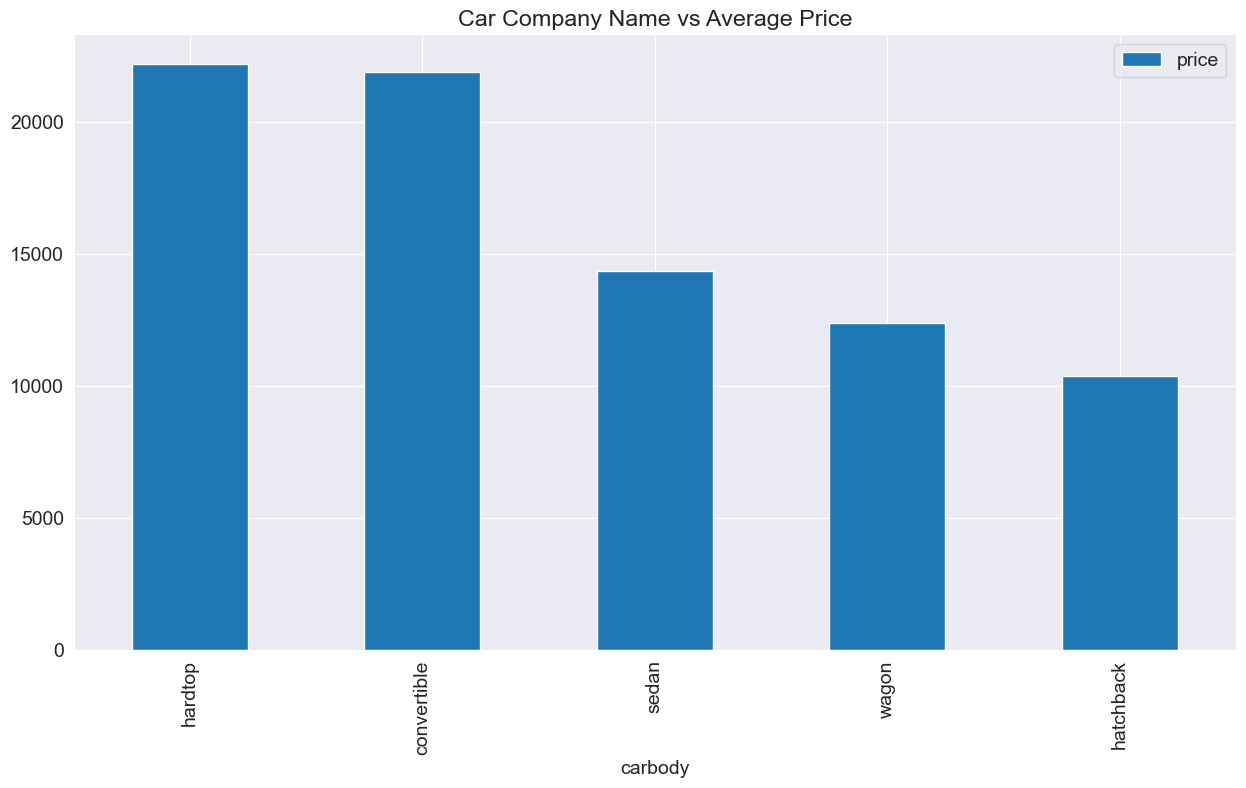

In [24]:
plt.figure(figsize=(8, 4))

df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights :

- hardtop and convertible seems to have the highest average price.

#### Analysing Numerical variables

###### Create dataframe contains numeric variables

In [25]:
df_numeric = df.select_dtypes(['int64', 'float64'])
df_numeric.drop(['price'], axis=1, inplace=True)
df_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [26]:
df_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [27]:
df_numeric.columns.nunique()

13

###### Summary

- There are 14 numerical values
- Contains both contionues and discreate

###### Checking outliers in numerical variables

In [28]:
print(round(df_numeric.describe(), 2))

       wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
count     205.00     205.00    205.00     205.00      205.00      205.00   
mean       98.76     174.05     65.91      53.72     2555.57      126.91   
std         6.02      12.34      2.15       2.44      520.68       41.64   
min        86.60     141.10     60.30      47.80     1488.00       61.00   
25%        94.50     166.30     64.10      52.00     2145.00       97.00   
50%        97.00     173.20     65.50      54.10     2414.00      120.00   
75%       102.40     183.10     66.90      55.50     2935.00      141.00   
max       120.90     208.10     72.30      59.80     4066.00      326.00   

       boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
count     205.00  205.00            205.00      205.00   205.00   205.00   
mean        3.33    3.26             10.14      104.12  5125.12    25.22   
std         0.27    0.31              3.97       39.54   476.99     6.54   
min        

- On closer observation, there may contain outliers 

 Drawing boxplot to visualize which variables contain the outliers

In [1]:
plt.figure(figsize=(15,10))
n=1
for feature in df_numeric.columns:
    plt.subplot(5, 3, n)
    fig = df.boxplot(column= feature)
    fig.set_title('')
    fig.set_ylabel(feature)
    n+=1

NameError: name 'plt' is not defined

- The above boxplot shows that wheelbase, carlength, carwidth, enginesize, stroke, compressionratio, horsepower, citympg and highwaympg contains outliers 

##### Checking the distribution of variables

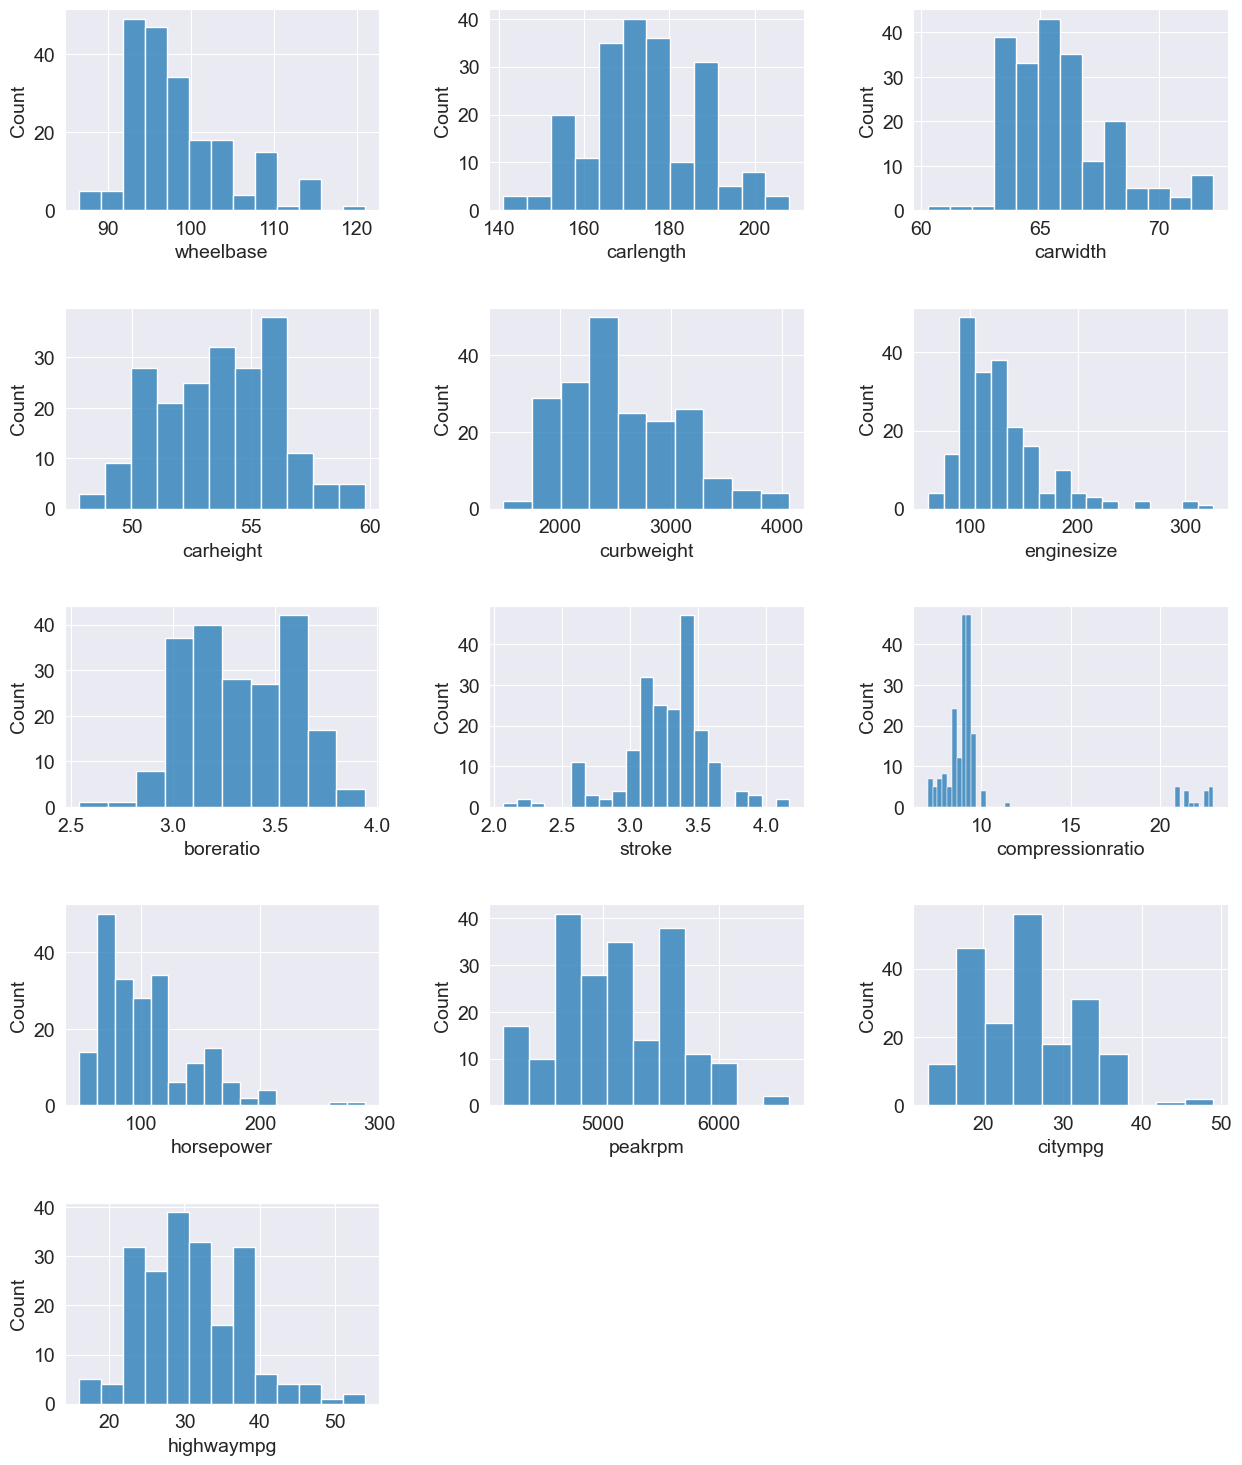

In [30]:
plt.figure(figsize=(15,10))
n=1
for feature in df_numeric.columns:
    plt.subplot(5, 3, n)
    plt.tight_layout(pad=2)
    fig = plt.gcf()
    fig.set_size_inches(13, 15)
    sns.histplot(data=df, x= feature)
    n+=1

Using interquantile range to find the outliers

In [31]:
# find outliers for numerical variables

for feature in df_numeric.columns:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = round((df[feature].quantile(0.25) - (IQR * 3)), 3)
    Upper_fence = round((df[feature].quantile(0.75) + (IQR * 3)), )
    print(feature, 'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    if Lower_fence < df[feature].min() and Upper_fence >  df[feature].max():
        print('For{}, outliers are less than {} and greater than {} \n' .format(feature, df[feature].min(), df[feature].max()))
    elif Lower_fence < df[feature].min():
        print('For{}, outliers are less than {}  \n' .format(feature, df[feature].min()))
    elif Upper_fence >  df[feature].max():
        print('For{}, outliers are greater than {} \n' .format(feature, df[feature].max()) )

wheelbase outliers are values < 70.8 or > 126
Forwheelbase, outliers are less than 86.6 and greater than 120.9 

carlength outliers are values < 115.9 or > 233
Forcarlength, outliers are less than 141.1 and greater than 208.1 

carwidth outliers are values < 55.7 or > 75
Forcarwidth, outliers are less than 60.3 and greater than 72.3 

carheight outliers are values < 41.5 or > 66
Forcarheight, outliers are less than 47.8 and greater than 59.8 

curbweight outliers are values < -225.0 or > 5305
Forcurbweight, outliers are less than 1488 and greater than 4066 

enginesize outliers are values < -35.0 or > 273
Forenginesize, outliers are less than 61  

boreratio outliers are values < 1.86 or > 5
Forboreratio, outliers are less than 2.54 and greater than 3.94 

stroke outliers are values < 2.21 or > 4
compressionratio outliers are values < 6.2 or > 12
Forcompressionratio, outliers are less than 7.0  

horsepower outliers are values < -68.0 or > 254
Forhorsepower, outliers are less than 48  

#### Analysing categorical variables

In [32]:
categorical = [feature for feature in df.columns if df[feature].dtype=='O']

In [33]:
df_categorical = df[categorical]

In [34]:
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 11 categorical variables

The categorical variables are : ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [35]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

symboling  contains  6  labels
fueltype  contains  2  labels
aspiration  contains  2  labels
doornumber  contains  2  labels
carbody  contains  5  labels
drivewheel  contains  3  labels
enginelocation  contains  2  labels
enginetype  contains  7  labels
cylindernumber  contains  7  labels
fuelsystem  contains  8  labels
CarBrand  contains  22  labels


###### Insights:

- Total 11 categorical variables are present
- There are 4 binary categorical variable
- CarBrand columns has very high cardinality

##### Correlation

<AxesSubplot: >

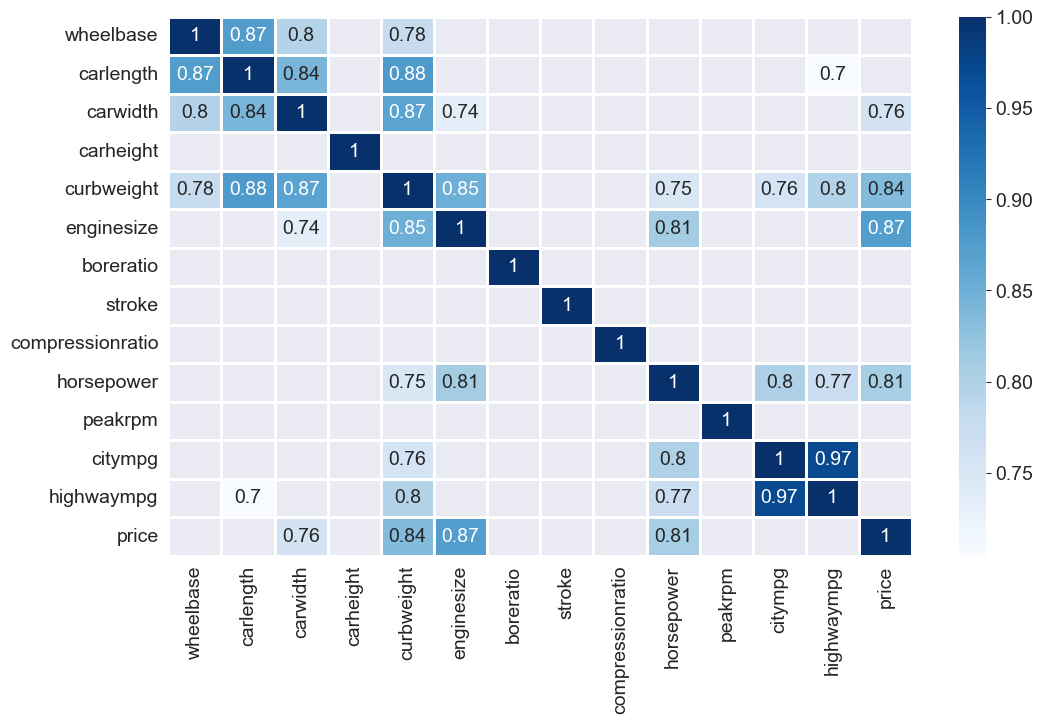

In [36]:
plt.figure(figsize=(12,7))
corr = df.corr(numeric_only = True).abs()
mask = corr < 0.7
sns.heatmap(corr, annot=True, mask=mask ,cmap='Blues', linewidth=1)

##### Insights:

- Features like carwidth, curbweight, enginesize, horsepower havea a high correlation with target.
- citympg abd highwaympg are highly correlated, about 97%
- curbweight also have strong correlation with citympg(76%) and highwaympg(80%) and it is more strong with highwaympg
- enginesize and horsepower have strong correlation of 81%
- carwidth and curbweight have strong correlation of 87%
- carwidth and enginesize have strong correlation of 74%
- carlength, carweight, curbweight and wheelbase are also correlated.

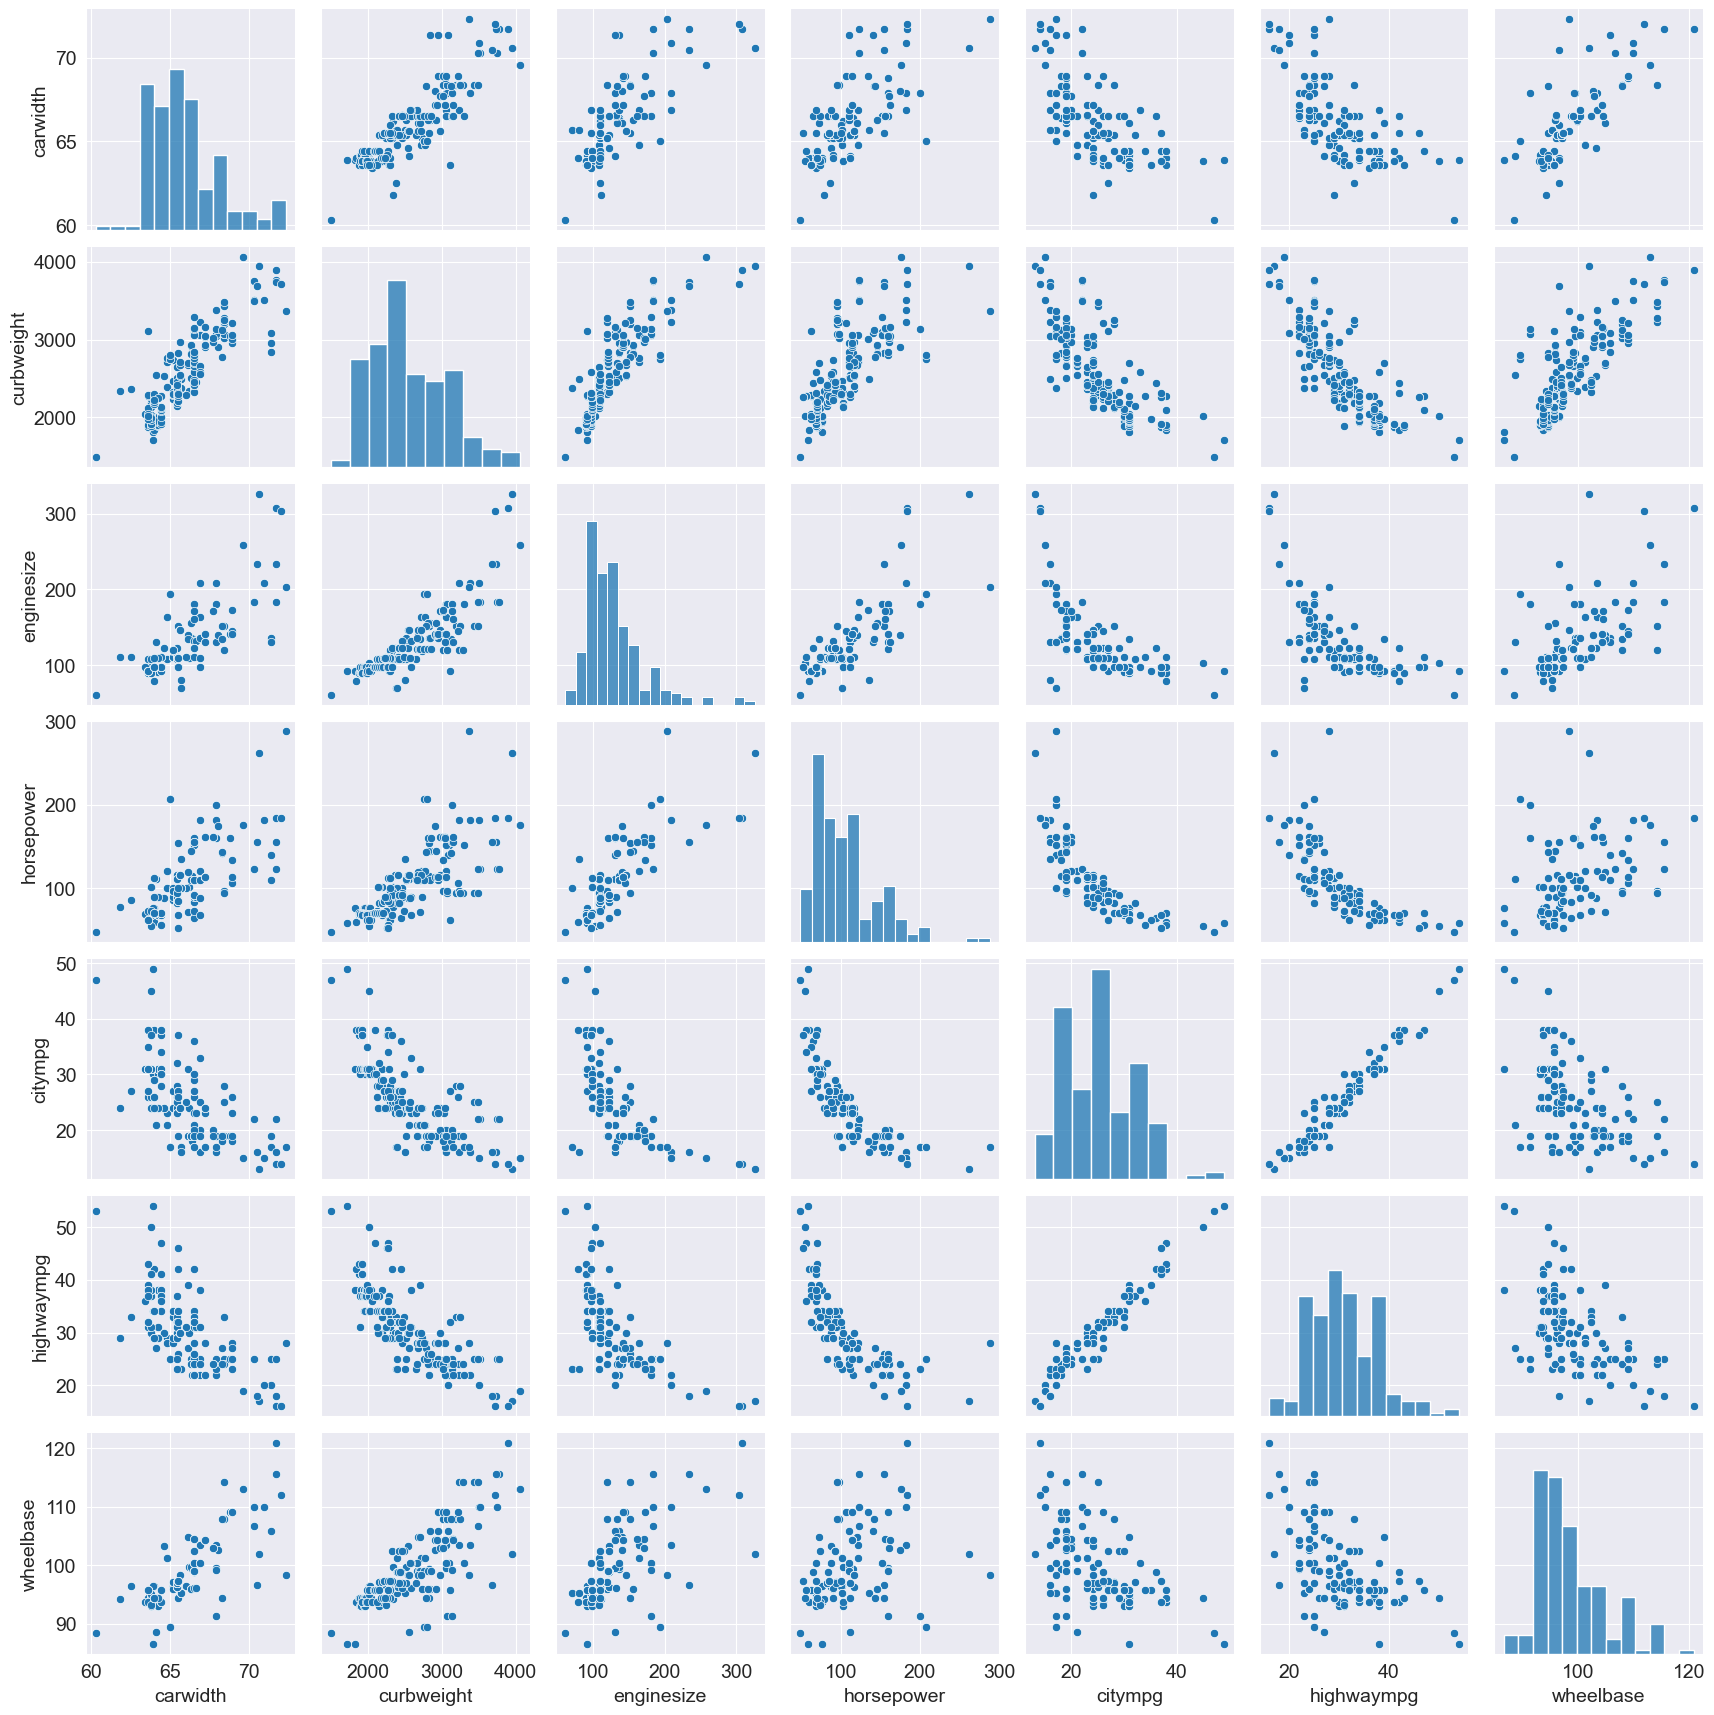

In [37]:
# Pairplot tho see the relationship of hightly positively correlated variables

num_vari = ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'wheelbase']
sns.pairplot(data = df[num_vari], kind='scatter', diag_kind='hist')
plt.show()

### Feature Engineering

In [74]:
df1 = df.drop(['price'], axis = 1)

In [75]:
numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

#### Dealing with numerical varaibles

In [40]:
numeric = df_numeric.columns

In [41]:
# Removing outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df[numeric])) < 3).all(axis=1)]

### Preparing data splitting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X  = df.drop(['price'], axis=1)
y = df['price']

In [45]:
train_df, test_df, train_tar, test_tar = train_test_split(X, y, random_state = 1, test_size = .3)

In [46]:
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)
print('train_tar.shape :', train_tar.shape)
print('test_tar.shape :', test_tar.shape)

train_df.shape : (127, 24)
test_df.shape : (55, 24)
train_tar.shape : (127,)
test_tar.shape : (55,)


In [47]:
### Scaling Numeric features

from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler().fit(df[numeric])

In [49]:
train_df[numeric] = scaler.transform(train_df[numeric])
test_df[numeric] = scaler.transform(test_df[numeric])

In [50]:
train_df.describe().loc[['min', 'max']]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
min,0.068966,0.093103,0.0,0.0,0.009226,0.0,0.000000,0.0,0.0,0.0,0.0,0.043478,0.0
max,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.873016,1.0,1.0,1.0,1.0,1.000000,1.0


### Dealing with categoricalvariable

In [51]:
# Encoding Categorical variable 
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical])

In [53]:
encoded_cols = list(encoder.get_feature_names(categorical))

C:\Brocamp\Jupyter\jupyter_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
train_df[encoded_cols] = encoder.transform(train_df[categorical])
test_df[encoded_cols] = encoder.transform(test_df[categorical])

In [55]:
train_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarBrand,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
81,3,gas,std,two,hatchback,fwd,front,0.334483,0.489655,0.363636,0.054545,0.260892,ohc,four,0.317073,2bbl,0.531746,0.714286,0.100000,0.190476,0.459459,0.434783,0.482759,mitsubishi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,2,gas,std,two,hatchback,rwd,front,0.406897,0.544828,0.383838,0.290909,0.375192,ohc,four,0.463415,mpfi,0.746032,0.740260,0.153333,0.380952,0.351351,0.391304,0.413793,toyota,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,0,gas,std,two,sedan,rwd,front,0.503448,0.555172,0.303030,0.500000,0.456689,ohc,six,0.573171,mpfi,0.500000,0.538961,0.133333,0.414966,0.054054,0.260870,0.344828,bmw,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,3,gas,std,two,hatchback,rwd,front,0.562069,0.670690,0.595960,0.290909,0.613532,dohc,six,0.615854,mpfi,0.468254,0.642857,0.153333,0.687075,0.567568,0.173913,0.206897,toyota,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108,0,diesel,turbo,four,sedan,rwd,front,0.734483,0.725862,0.666667,0.718182,0.706304,l,four,0.500000,idi,0.809524,0.753247,0.933333,0.238095,0.000000,0.565217,0.517241,peugeot,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
 train_df[encoded_cols].shape

(127, 62)

In [76]:
X_train = train_df[numeric_cols + encoded_cols]
X_test = test_df[numeric_cols + encoded_cols]

In [77]:
y_train , y_test = train_tar, test_tar

In [84]:
X_train.shape, y_train.shape

((127, 75), (127,))

### Model Creation

In [93]:
from sklearn.linear_model import Ridge

In [94]:
ridge_model1 = Ridge() # Alpha = 1
ridge_model1.fit(X_train, y_train)

Ridge()

In [85]:
ridge_model1.score(X_train,y_train)

0.9575851478211561

In [88]:
ridge_model1.intercept_

13210.655749021818

In [97]:
prediction_model1 = ridge_model1.predict(X_test)

In [109]:
## model with alpha= 0.001

In [110]:
ridge_model2 = Ridge(alpha = 0.001)
ridge_model2.fit(X_train, y_train)

Ridge(alpha=0.001)

In [111]:
ridge_model2.score(X_train,y_train)

0.9725670743050261

In [112]:
prediction_model2 = ridge_model2.predict(X_test)

In [121]:
from sklearn import metrics
print('Model with alpha value 1')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction_model1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_model1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction_model1)))
print('r2_score:', metrics.r2_score(y_test,prediction_model1))

Mean Absolute Error: 1725.266235624357
Mean Squared Error: 8512109.32604683
Root Mean Squared Error: 2917.551940591089
r2_score: 0.8554473372944559


In [123]:
print('Model with alpha value 0.001')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction_model2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_model2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction_model2)))
print('r2_score:', metrics.r2_score(y_test,prediction_model2))

Model with alpha value 0.001
Mean Absolute Error: 1748.8283690643746
Mean Squared Error: 6991601.932890389
Root Mean Squared Error: 2644.1637492580503
r2_score: 0.8812685977982029
